In [1]:
import gym
import matplotlib.pyplot as plt
import torch
import numpy as np
import timebudget
from tqdm.auto import tqdm
timebudget.set_quiet()

In [2]:
import rltrain
from importlib import reload
reload(rltrain)

<module 'rltrain' from '/Users/leodirac/dev/ddpg/rltrain.py'>

In [3]:
env = gym.make('CartPole-v0')
learner = rltrain.DQN(env, gamma=0.9)
learner.show_loss_every = 1000


Creating FCNet with 4->2 dims for 4 observations and 2 actions


In [4]:
import helpers
reload(helpers)

<module 'helpers' from '/Users/leodirac/dev/ddpg/helpers.py'>

2180


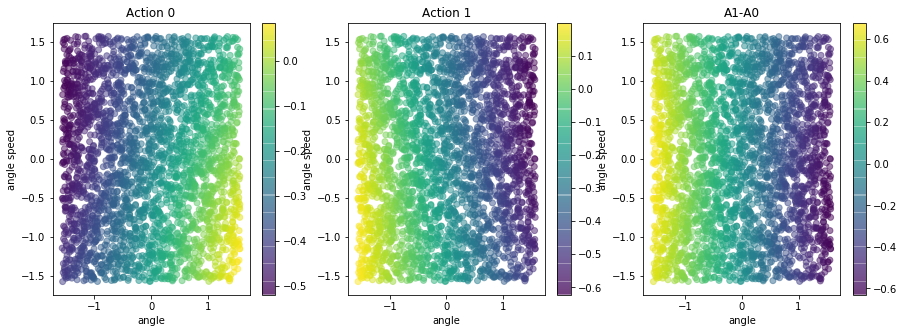

4493


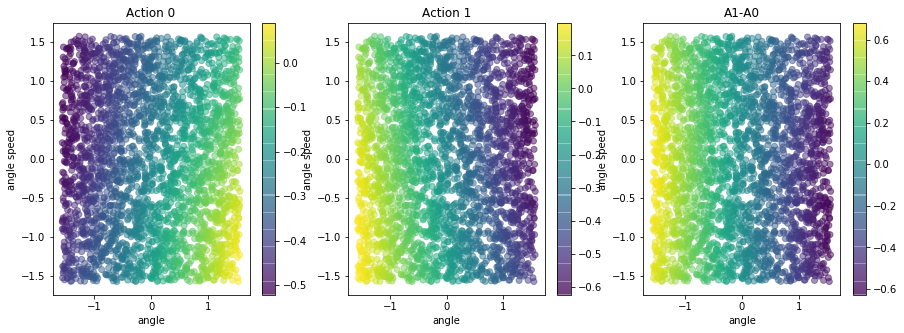

6841


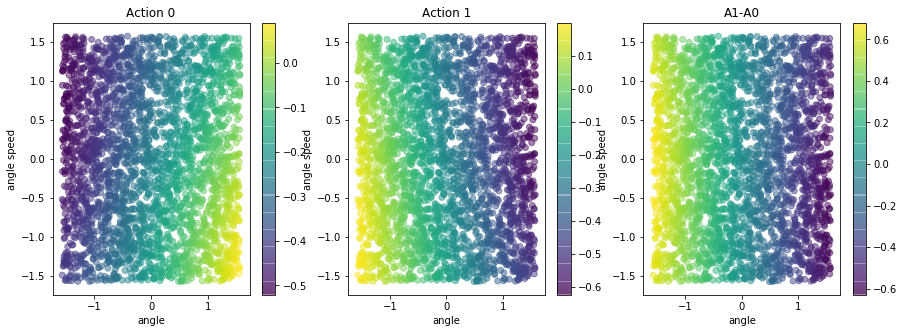

8776


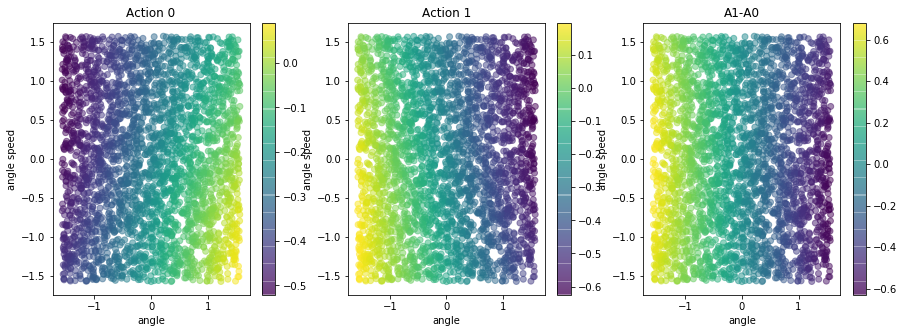

In [5]:
learner.eps = 1
viz = helpers.CartPoleViz(learner)
for i in tqdm(range(400), "random warmup"):
    learner.rollout()
    if i % 100 == 99:
        print(len(learner._replay))
        viz.plot_q()



Eps = 1.00 on 1 of 5
Loss = 0.65520


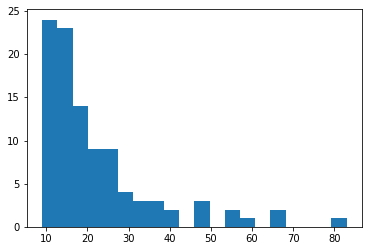

Reward mean,std = 22.260 +/- 14.058


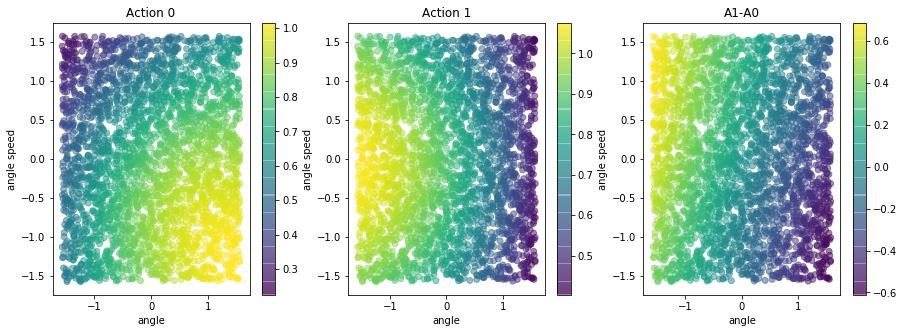



Eps = 0.82 on 2 of 5
Loss = 0.43816
Loss = 0.35046


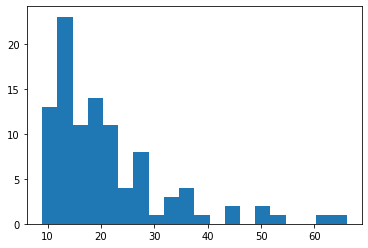

Reward mean,std = 21.170 +/- 11.382


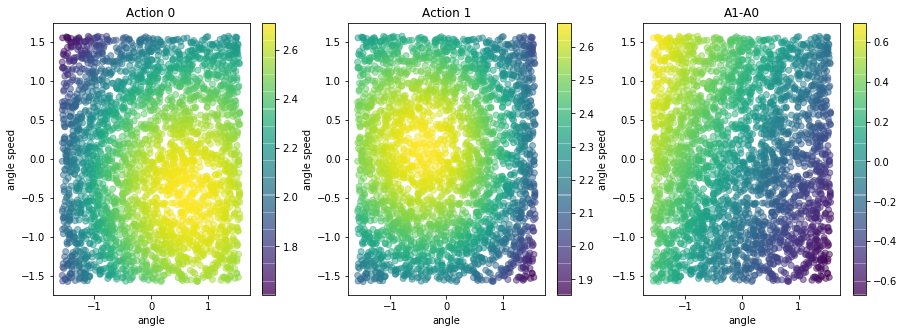



Eps = 0.64 on 3 of 5
Loss = 0.31917
Loss = 0.29062
Loss = 0.24819
Loss = 0.24597


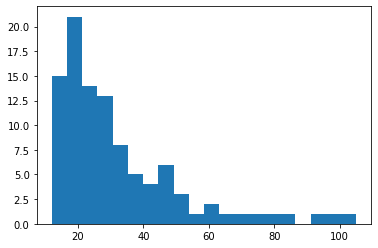

Reward mean,std = 32.250 +/- 19.397


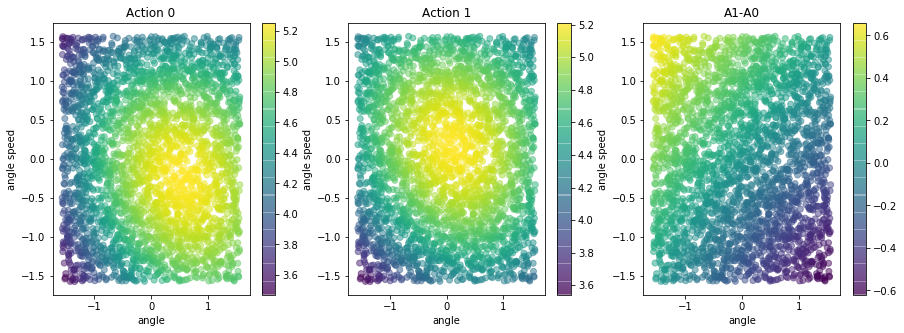



Eps = 0.45 on 4 of 5
Loss = 0.12786
Loss = 0.41061
Loss = 0.18599
Loss = 0.19081
Loss = 0.30371
Loss = 0.05235
Loss = 0.05317


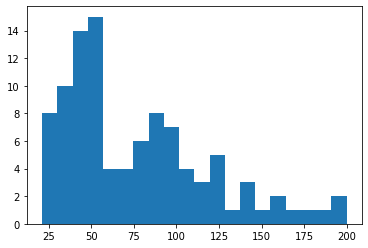

Reward mean,std = 76.230 +/- 42.940


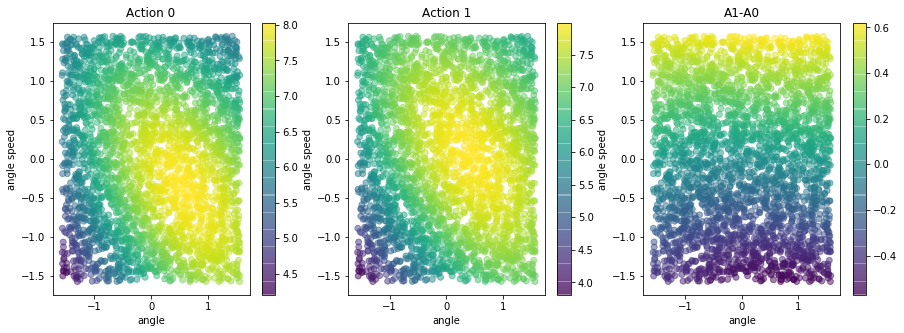



Eps = 0.27 on 5 of 5
Loss = 0.24018
Loss = 0.21204
Loss = 0.02408
Loss = 0.37780
Loss = 0.01329
Loss = 0.41639
Loss = 0.01773
Loss = 0.23863
Loss = 0.23034
Loss = 0.00812
Loss = 0.15919
Loss = 0.22302
Loss = 0.19972
Loss = 0.21002
Loss = 0.16669
Loss = 0.20951
Loss = 0.26506


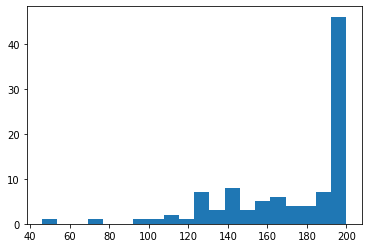

Reward mean,std = 172.560 +/- 33.515


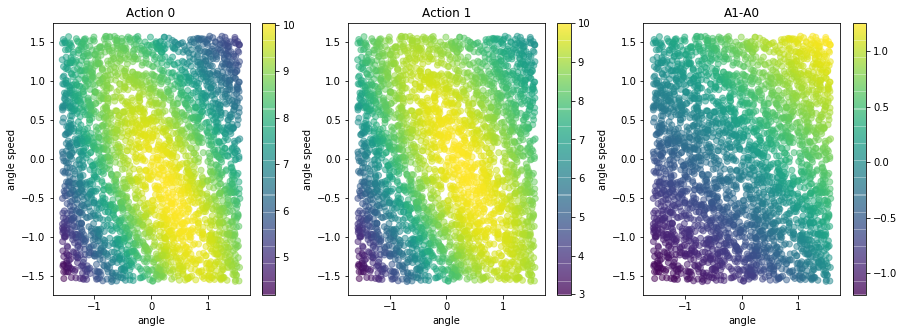

In [6]:
N = 5
for d in range(N):
    eps = 1.0 - d/(N+0.5)
    print(f"\n\nEps = {eps:.2f} on {d+1} of {N}")
    _ = helpers.rollout_score_dist(learner, eps)
    viz.plot_q()

Loss = 0.00567
Loss = 0.00625
Loss = 0.21028
Loss = 0.00523
Loss = 0.48618
Loss = 0.20036
Loss = 0.00164
Loss = 0.00273
Loss = 0.00232
Loss = 0.21932
Loss = 0.00216
Loss = 0.00082
Loss = 0.21724
Loss = 0.00221
Loss = 0.00166
Loss = 0.41771
Loss = 0.24563
Loss = 0.21516
Loss = 0.23467
Loss = 0.25134


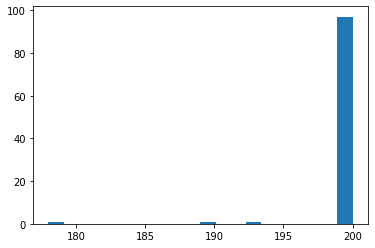

Reward mean,std = 199.600 +/- 2.526


In [7]:
# check greedy
_ = helpers.rollout_score_dist(learner, 0)

Loss = 0.00162
Loss = 0.20875


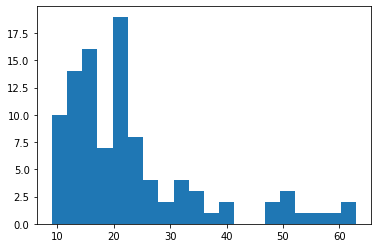

Reward mean,std = 23.120 +/- 12.595


In [8]:
# check random
_ = helpers.rollout_score_dist(learner, 1)

In [9]:
timebudget.report('rollout')

timebudget report per rollout cycle...
                  rollout: 100.0%    49.92ms/cyc @     1.0 calls/cyc
              do_learning:  89.3%    44.59ms/cyc @    56.7 calls/cyc
                optimizer:  49.9%    24.91ms/cyc @    48.0 calls/cyc
                   sample:  15.0%     7.50ms/cyc @    48.0 calls/cyc
                 q_target:  10.0%     4.98ms/cyc @    48.0 calls/cyc


In [10]:
learner.eps=0
learner.rollout(render=True)

Loss = 0.27696


(199, 200.0)